# MOOC-Drop-Rate-Prediction-Competition-master

Understanding the Dataset Structure
Data Cleaning
 NULL Values
 Converting Datatypes (Like date, numbers, replace names, etc)
 Duplicate Rows
 Verify Unbalanced
 Outliers
Feature Selections
 Corelation
 p-value
Feature Scaling
Train and Test splitting
Balance Train data
Prepare Model and find best acuracy
Predict Model

[Importing the libraries] (#-Step-1-Importing-libraries-and-Loading-the-Data)

1. Libraries and Data set (#df1)  
    1.1 Importing required libraries   
    1.2 Reading the data set  
    1.3 Identifying Rows, Columns and names of columns  
    1.4 Identifying Target column  
2. EDA - (Exploratory Data Analysis) (#df2)  
    2.1 Missing Values 
        2.1.1 Total information of the data frame  
        2.1.2 Identifying missing values  
        2.1.3 Imputing (Handling) Missing values, if exits  
    2.2 Converting Data Types  
        2.2.1 Converting specific columns to DateTime format   
    2.3 Duplicate Rows  
        2.3.1 Identifying duplicate rows  
        2.3.2 Removing duplicate rows  
    2.4 Outliers  (#df3)
        2.4.1 Data describing  (# df3_desc) 
        2.4.2 Identifying existance of outliers  
        2.4.3 Replacing outliers by analysing through Graphs
            2.4.3.1 "Access" column
            2.4.3.2 "Access" column
            2.4.3.3 "discussion" column
            2.4.3.4 "navigate" column
            2.4.3.5 "page_close" column
            2.4.3.6 "problem" column
            2.4.3.7 "video" column
            2.4.3.8 "wiki" column
            2.4.3.9 "problem" column
            2.4.3.10 "present_days" column
            2.4.3.11 "effective_time" column
    2.5 Analysing columns (#df3)
        2.5.1 Distribution of Course Drop Rate
        2.5.2 Students presenting in days
        2.5.3 Students drop or non-drop during a week
        2.5.4 Number of times the courses opted
3. Feature Selections  (#df4)
    3.1 Correlations 
        3.1.1 Identifying correlations among features
        3.1.2 Removing low correlated columns
4. Features Scaling
    4.1 Creating input (X) and output (y) 
    4.2 Log Transformation
    4.3 Standard Scaling
5. Feature Engineering
    5.1 Verifying that the data is Balanced/Unbalanaced
    5.2 Spliting training and testing data before UpSampling
    5.3 Balancing the training data by UpSampling
6. Model Selection (# X_train, y_train, X_test, y_test)
    6.1 Importing Required Libraries
    6.2 Creating a function which finds accuracy of train and test data
    6.3 Run the function
7. Hyperparameter Tuning
    7.1 Importing Required Libraries
    7.2 Create a function for tuning parameters
    7.3 Run the function


# 1) Libraries and Data Set
================================================================================================================

##### 1.1) Importing required libraries
Importing required libraires which are essential for this project

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math

# Ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set to view all the columns here
pd.set_option('display.max_columns', None)

##### 1.2) Reading  the data set
Importing the data set using the pandas library and display 5 rows data

In [2]:
df1 = pd.read_csv('MOOC_Visual.csv')
df1.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
2,3,2014-06-04,2014-06-08,34,1,6,7,0,9,0,...,1,1,1,0,1,0,3005,2,0.868481,0
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1


##### 1.3) Identifying Rows and Columns in "MOOC_Df" data frame

In [5]:
print('\t\t"df1" Structure :')
print("="*50)
print("Shape \t\t  : ", df1.shape)
print("Number of Rows \t  : ", len(df1))
print("Number of Columns : ", len(df1.columns))
print("="*50)

print("\n")

print("="*50)
print("Columns Names :")
print("-"*15)
print(list(df1.columns))
print("="*50)

		"df1" Structure :
Shape 		  :  (72325, 25)
Number of Rows 	  :  72325
Number of Columns :  25


Columns Names :
---------------
['enrollment_id', 'startdate', 'enddate', 'access', 'discussion', 'navigate', 'page_close', 'problem', 'video', 'wiki', 'proccess_period', 'present_days', 'effective_time', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'holidays', 'course_enroll', 'user_enroll', 'course_drop_rate', 'dropout_prob']


In [3]:
df1.dtypes

enrollment_id         int64
startdate            object
enddate              object
access                int64
discussion            int64
navigate              int64
page_close            int64
problem               int64
video                 int64
wiki                  int64
proccess_period     float64
present_days          int64
effective_time      float64
Friday                int64
Monday                int64
Saturday              int64
Sunday                int64
Thursday              int64
Tuesday               int64
Wednesday             int64
holidays              int64
course_enroll         int64
user_enroll           int64
course_drop_rate    float64
dropout_prob          int64
dtype: object

##### 1.4) Identifying Target column

"**dropout_prob**" is the target column

# 2) EDA - (Exploratory Data Analysis)
================================================================================================================

In [5]:
df2 = df1.copy()

### 2.1) ==================================== Missing Values  ====================================

##### 2.1.1) Total information of the data frame

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72325 entries, 0 to 72324
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enrollment_id     72325 non-null  int64  
 1   startdate         72325 non-null  object 
 2   enddate           72325 non-null  object 
 3   access            72325 non-null  int64  
 4   discussion        72325 non-null  int64  
 5   navigate          72325 non-null  int64  
 6   page_close        72325 non-null  int64  
 7   problem           72325 non-null  int64  
 8   video             72325 non-null  int64  
 9   wiki              72325 non-null  int64  
 10  proccess_period   72325 non-null  float64
 11  present_days      72325 non-null  int64  
 12  effective_time    72325 non-null  float64
 13  Friday            72325 non-null  int64  
 14  Monday            72325 non-null  int64  
 15  Saturday          72325 non-null  int64  
 16  Sunday            72325 non-null  int64 

##### 2.1.2) Identifying Missing Values in each Column

In [8]:
df2.isnull().sum()

enrollment_id       0
startdate           0
enddate             0
access              0
discussion          0
navigate            0
page_close          0
problem             0
video               0
wiki                0
proccess_period     0
present_days        0
effective_time      0
Friday              0
Monday              0
Saturday            0
Sunday              0
Thursday            0
Tuesday             0
Wednesday           0
holidays            0
course_enroll       0
user_enroll         0
course_drop_rate    0
dropout_prob        0
dtype: int64

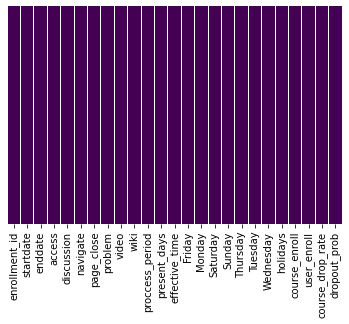

In [10]:
# Visualization
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
pass

**Observations**: There are no NULL values in the data set.

##### 2.1.3) Imputing (Handling) Missing values

Since, there are no null values, we can skip this task.

### 2.2) =============================== **Converting Data Types**  ===============================

##### 2.2.1) Converting specific columns to DateTime format 

In [11]:
df2['startdate'] = pd.to_datetime(df2['startdate'])
df2['enddate'] = pd.to_datetime(df2['enddate'])

In [12]:
df2.dtypes

enrollment_id                int64
startdate           datetime64[ns]
enddate             datetime64[ns]
access                       int64
discussion                   int64
navigate                     int64
page_close                   int64
problem                      int64
video                        int64
wiki                         int64
proccess_period            float64
present_days                 int64
effective_time             float64
Friday                       int64
Monday                       int64
Saturday                     int64
Sunday                       int64
Thursday                     int64
Tuesday                      int64
Wednesday                    int64
holidays                     int64
course_enroll                int64
user_enroll                  int64
course_drop_rate           float64
dropout_prob                 int64
dtype: object

##### Finding in time period in days

In [ ]:
# time_period_days = (MOOC_Df['enddate']-MOOC_Df['startdate']).dt.days
# MOOC_Df.insert(3,"time_period_days", time_period_days)
# time_period_days = (MOOC_Df['enddate']-MOOC_Df['startdate']).dt.days+1
# np.where(time_period_days!=MOOC_Df['present_dayss'])[0]
# Output: array([    7,    10,    11, ..., 72310, 72312, 72318], dtype=int64)
# len(np.where(time_period_days==MOOC_Df['present_days'])[0])
# Output: 45207

### 2.3) =============================== **Duplicate Rows**  ===============================

##### 2.3.1) Identifying duplicate rows

In [6]:
df2.drop(['enrollment_id', 'startdate', 'enddate'], axis=1).duplicated().sum()

8582

Duplicate rows     : 8582
Non Duplicate rows : 63743


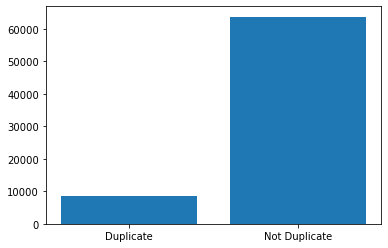

In [14]:
# Excluding columns 'enrollment_id', 'startdate', 'enddate'
# ----------------------------------------------------------------------------------

# Duplicate data count
duplicate_count = df2.drop(['enrollment_id', 'startdate', 'enddate'], axis=1).duplicated().sum()
# Not duplicate data count
not_duplicate_count = len(df2) - duplicate_count

print(f'Duplicate rows     : {duplicate_count}')
print(f'Non Duplicate rows : {not_duplicate_count}')
plt.bar(x=['Duplicate', 'Not Duplicate'], height=[duplicate_count, not_duplicate_count])
pass

##### 2.3.2) Removing duplicate rows

In [14]:
print("Before removing duplicates : ", df2.shape)
duplicate_index = df2[df2.drop(['enrollment_id', 'startdate', 'enddate'], axis=1).duplicated()].index
df2 = df2.drop(duplicate_index)
print("After removing duplicates  : ", df2.shape)

Before removing duplicates :  (72325, 25)
After removing duplicates  :  (63743, 25)


In [11]:
df2.to_csv('df2.csv', index=False)

### 2.4) ================================= **Outliers** =================================

**Outlier**: An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

**Why outlier exists**: Outlier exists due to the data may have been coded incorrectly or an experiment may not have been run correctly.  
**Insignificant outliers**: If the data contains insignificant outliers, the outlying value should be deleted from the analysis (or corrected if possible). Note that while deleting the outliers, we need to cross check that how that data are impacting on other column's data and make sure that we don't lose any significant information.  
**Significant outliers**: If the data contains significant outliers, we typically do not want to simply delete the outlying observation, need to consider robust statistical techniques.

Identifying an observation as an outlier depends on the underlying distribution of the data. In this section, we limit the discussion to univariate data sets.

##### Data describing

In [54]:
df3 = pd.read_csv('df2.csv', parse_dates=['startdate','enddate'])

##### 2.4.1) Data describing

In [13]:
df3_desc = df3.describe().T
df3_desc

,count,mean,std,min,25%,50%,75%,max
enrollment_id,72325.0,36163.000000,20878.573447,1.000000,18082.000000,36163.000000,54244.000000,72325.000000
access,72325.0,25.707045,54.679282,0.000000,1.000000,6.000000,26.000000,3659.000000
discussion,72325.0,5.247992,28.351693,0.000000,0.000000,0.000000,2.000000,1930.000000
navigate,72325.0,8.330052,12.641069,0.000000,2.000000,4.000000,10.000000,409.000000
page_close,72325.0,10.182966,20.552585,0.000000,0.000000,2.000000,9.000000,413.000000
problem,72325.0,10.446429,34.335217,0.000000,0.000000,0.000000,6.000000,1014.000000
video,72325.0,6.566678,14.662946,0.000000,0.000000,1.000000,6.000000,536.000000
wiki,72325.0,0.741652,3.503804,0.000000,0.000000,0.000000,1.000000,243.000000
proccess_period,72325.0,5.790234,8.966359,0.000000,0.001204,0.045914,9.932766,29.987014
present_days,72325.0,2.662067,3.093727,1.000000,1.000000,1.000000,3.000000,30.000000


In [14]:
df3_desc[['min', '25%', 'mean', '75%', 'max']].T

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,present_days,effective_time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,645.000000,1.000000,0.666866,0.00000
25%,18082.0,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.001204,1.000000,0.021667,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,2151.000000,1.000000,0.763524,1.00000
mean,36163.0,25.707045,5.247992,8.330052,10.182966,10.446429,6.566678,0.741652,5.790234,2.662067,4.914761,0.3656,0.422482,0.328033,0.343173,0.39494,0.409139,0.3987,0.095099,5618.856772,2.460242,0.793640,0.79364
75%,54244.0,26.000000,2.000000,10.000000,9.000000,6.000000,6.000000,1.000000,9.932766,3.000000,3.726111,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000,0.000000,9382.000000,3.000000,0.836914,1.00000
max,72325.0,3659.000000,1930.000000,409.000000,413.000000,1014.000000,536.000000,243.000000,29.987014,30.000000,529.633611,5.0000,5.000000,5.000000,5.000000,5.00000,5.000000,5.0000,2.000000,12004.000000,27.000000,0.938356,1.00000


**Observation**: 
Most of the column values are large between `max` and `75%`, and those seem to be `right-skewed` (Not normal distributed), so we need to apply the `InterQuartileRange (IQR)` method, by using the technic `Extreme Outliers`.

**Check and remove outliers for the columns**: "access", "discussion", "navigate", "page_close", "problem", "video", "wiki", "proccess_period", "present_days", "effective_time".

**Excluding columns to remove outliers**: "Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday", "holidays", "course_enroll", "user_enroll", "course_drop_rate", "dropout_prob".

Since, we might have significant outliers, we need to verify outliers for each column separately.

##### 2.4.2) Identifying existance of outliers

In [25]:
min_max = (df3_desc['max'] - df3_desc['min']).values
min_mean = (df3_desc['mean'] - df3_desc['min']).values
min_75 = (df3_desc['75%'] - df3_desc['min']).values
pd.DataFrame([min_max, min_mean, min_75], columns=df3_desc.index, index=["min_max", "min_mean", "min_75"])

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,present_days,effective_time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
min_max,72324.000000,3659.000000,1930.000000,409.000000,413.000000,1014.000000,536.000000,243.000000,29.987014,29.000000,529.633611,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,2.000000,11359.000000,26.000000,0.271490,1.000000
min_mean,35630.540279,29.167752,5.954552,9.310967,11.553786,11.852878,7.450653,0.841504,6.569798,1.885838,5.576440,0.397236,0.460333,0.35709,0.371994,0.427059,0.441178,0.430949,0.103117,5105.633936,1.503569,0.124191,0.766657
min_75,53827.500000,32.000000,2.000000,11.000000,12.000000,8.000000,7.000000,1.000000,12.384022,2.000000,4.938194,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,8737.000000,2.000000,0.170049,1.000000


#### 2.4.3) Replacing outliers by analysing through Graphs

In [15]:
import seaborn as sns
from scipy import stats

##### 2.4.3.1) Creating a function to analyse the outliers

We want to visualize each column through the graphs `distplot()`, `boxplot()` and `probplot()`. So here we are creating a function which show all these 3 plots together. And also creating one more function which shows statistical deatils of the column.

In [55]:
def dist_box_stats_plots(data, col):
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    
    plt.title(col +' Dist-plot')
    sns.distplot(data[col], color='red')
    
    plt.subplot(1,3,2)
    plt.title(col + ' box-plot')
    sns.boxplot(x=data[col], palette=("magma"))
        
    plt.subplot(1,3,3)
    stats.probplot(data[col], plot = plt)
    plt.title(col + ' Probability Statistic')
    pass

# Creating a statistical function
# ================================
def column_stats(data, column_name, value):
    print("99% value \t\t: ", data[column_name].quantile(0.99))
    print("max value \t\t: ", data[column_name].max())
    print("Number of Ouliers \t: ", data.loc[data[column_name]>value, column_name].shape[0])
    print("Replace value \t\t: ", value)

##### 2.4.3.2) "Access" column

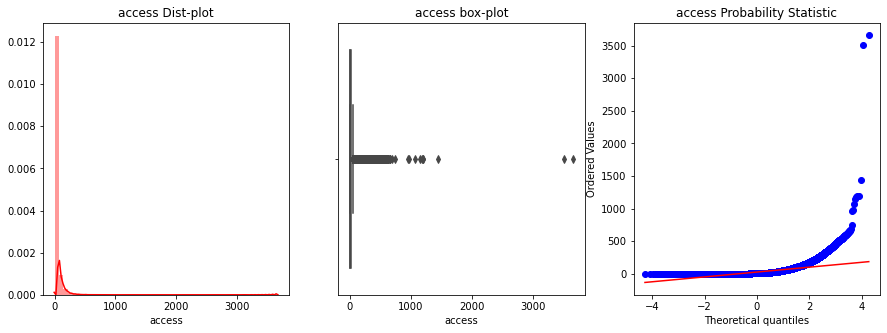

In [56]:
# Graphical representation of the column "access"
dist_box_stats_plots(df3, 'access')

**Observations**:
1. From `distplot`, the data is right-skewed.
2. From `Boxplot` and `probplot`, we can understand that the values more than 700 are outliers.
3. So, we consider the data whose "access" column values are lessthan 700.

In [58]:
# Statistical Details
column_stats(df3, 'access', 700)

99% value 		:  243.0
max value 		:  3659
Number of Ouliers 	:  11
Replace value 		:  700


In [59]:
# Assinging 700 value to all the values greater than 700.
df3 = df3[df3['access']<700]

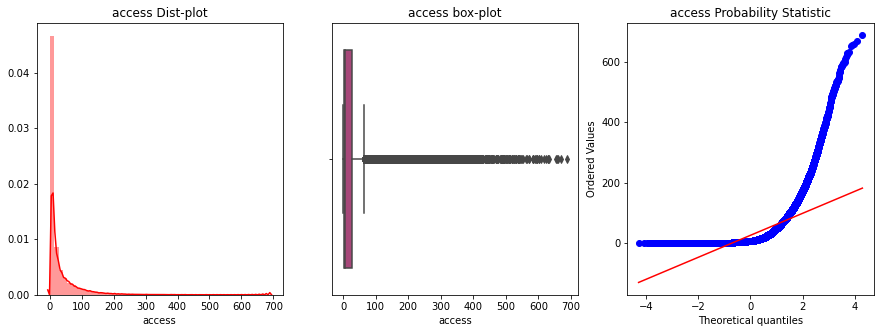

In [60]:
# Graphical representation of the column "access" after replacing values
dist_box_stats_plots(df3, 'access')

##### 2.4.3.3) "discussion" column

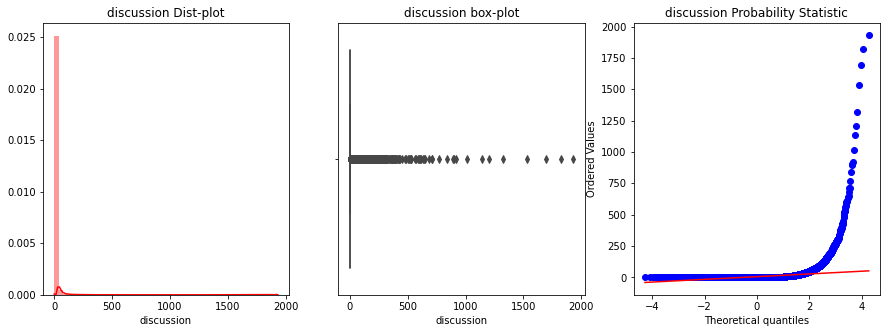

In [61]:
# Graphical representation of the column "discussion"
dist_box_stats_plots(df3, 'discussion')

In [62]:
# Columns Statistical Details
column_stats(df3, 'discussion', 1000)

99% value 		:  83.0
max value 		:  1930
Number of Ouliers 	:  8
Replace value 		:  1000


In [63]:
df3 = df3[df3['discussion']<1000]

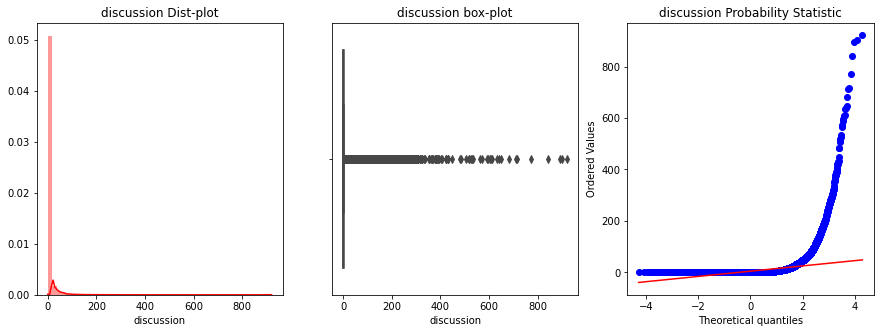

In [64]:
# Graphical representation of the column "discussion" after replacing values
dist_box_stats_plots(df3, 'discussion')

##### 2.4.3.4) "navigate" column

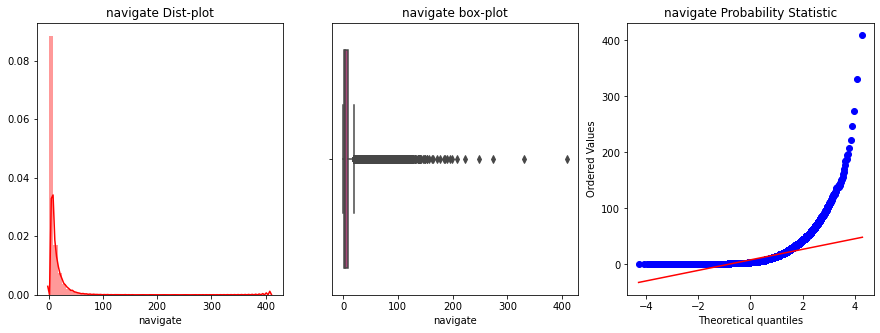

In [65]:
# Graphical representation of the column "navigate"
dist_box_stats_plots(df3, 'navigate')

In [66]:
# Columns Statistical Details
column_stats(df3, 'navigate', 200)

99% value 		:  59.0
max value 		:  409
Number of Ouliers 	:  6
Replace value 		:  200


In [67]:
# Assinging 200 value to all the values greater than 200.
df3 = df3[df3['navigate']<200]

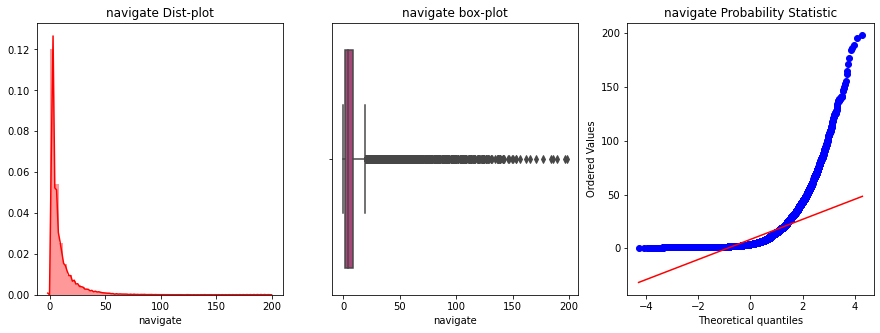

In [68]:
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots(df3, 'navigate')

##### 2.4.3.5) "page_close" column

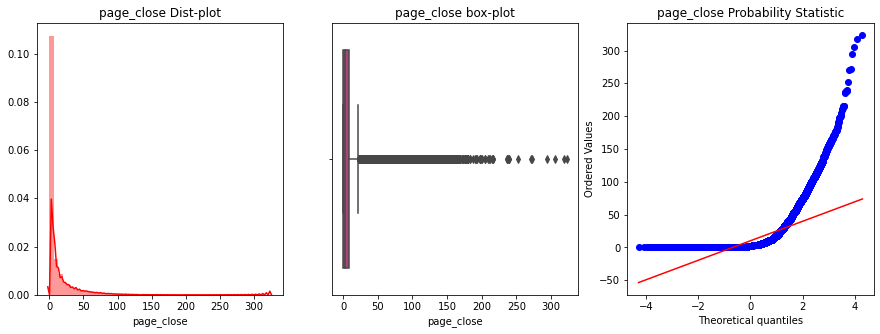

In [69]:
# Graphical representation of the column "page_close"
dist_box_stats_plots(df3, 'page_close')

In [76]:
# Columns Statistical Details
column_stats(df3, 'page_close', 250)

99% value 		:  99.0
max value 		:  323
Number of Ouliers 	:  7
Replace value 		:  250


In [77]:
# Assinging 300 value to all the values greater than 300.
df3 = df3[df3['page_close']<250]

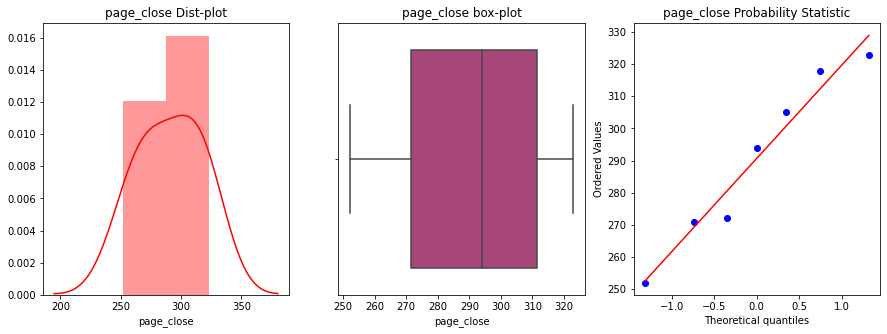

In [78]:
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots(df3, 'page_close')

##### 2.4.3.6) "problem" column

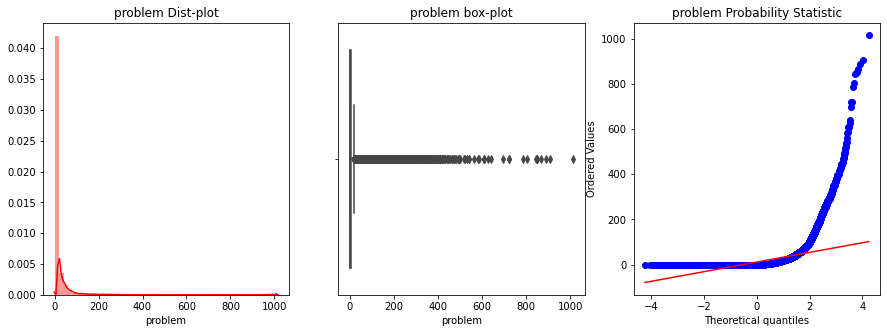

In [59]:
# Graphical representation of the column "page_close"
dist_box_stats_plots('problem')

In [60]:
# Columns Statistical Details
column_stats('problem', 630)

99% value 		:  182.0
max value 		:  1014
Number of Ouliers 	:  13
Replace value 		:  630


In [61]:
# Assinging 630 value to all the values greater than 630.
df3.loc[df3['problem']>630, 'problem'] = 630

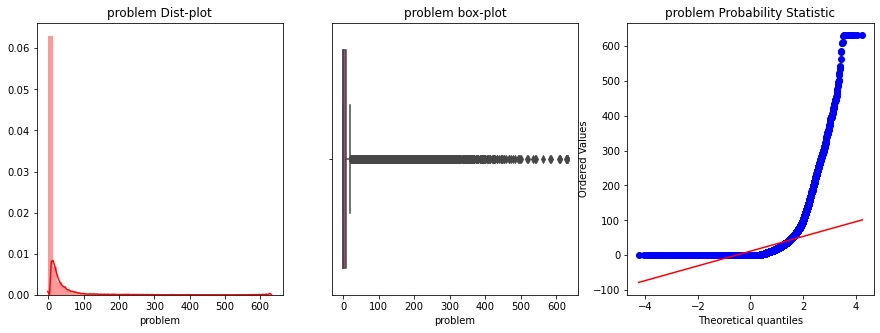

In [62]:
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots('problem')

##### 2.4.3.7) "video" column

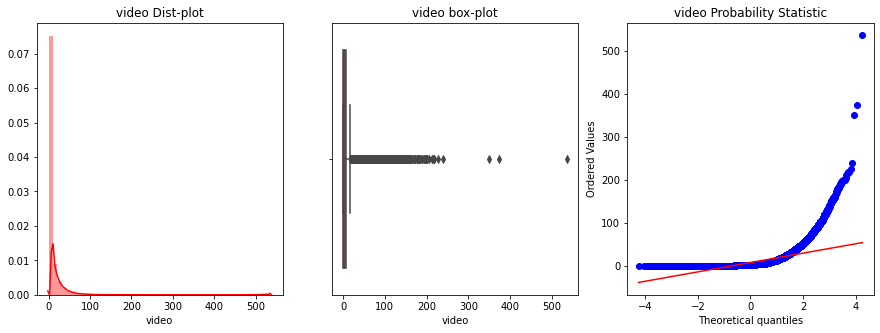

In [63]:
# Graphical representation of the column "video"
dist_box_stats_plots('video')

In [64]:
# Columns Statistical Details
column_stats('video', 300)

99% value 		:  74.0
max value 		:  536
Number of Ouliers 	:  3
Replace value 		:  300


In [65]:
# Assinging 300 value to all the values greater than 300.
df3.loc[df3['video']>300, 'video'] = 300

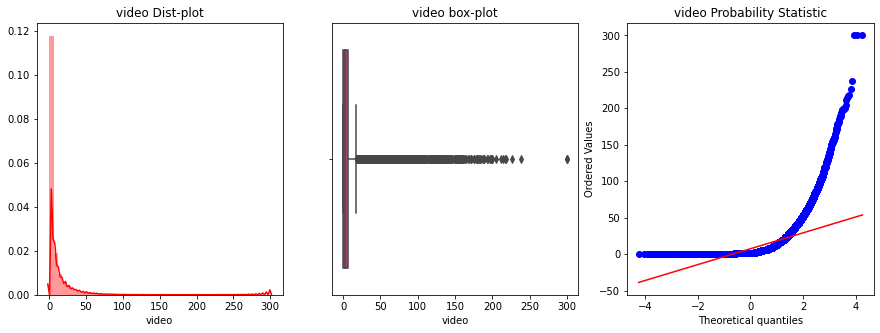

In [66]:
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots('video')

##### 2.4.3.8) "wiki" column

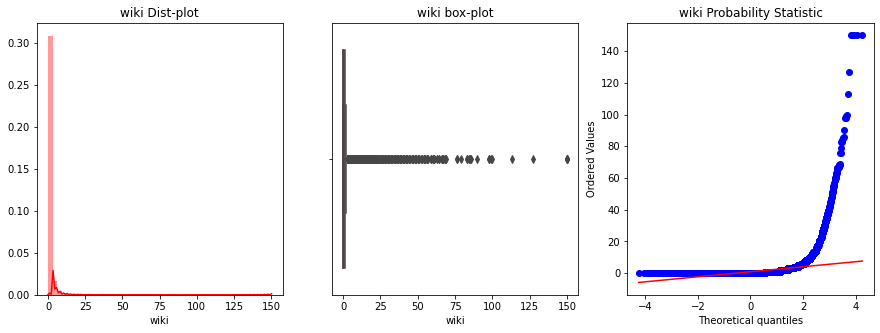

In [69]:
# Graphical representation of the column "wiki"
dist_box_stats_plots('wiki')

In [67]:
# Columns Statistical Details
column_stats('wiki', 150)

99% value 		:  11.0
max value 		:  243
Number of Ouliers 	:  5
Replace value 		:  150


In [70]:
# Assinging 150 value to all the values greater than 150.
df3.loc[df3['wiki']>150, 'wiki'] = 150

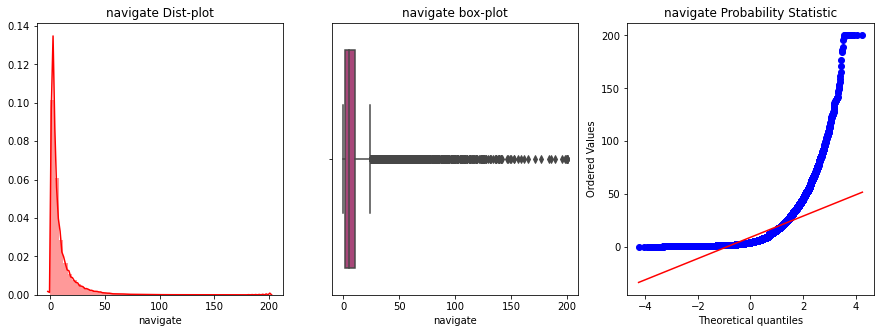

In [71]:
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots('navigate')

##### 2.4.3.9) "problem" column

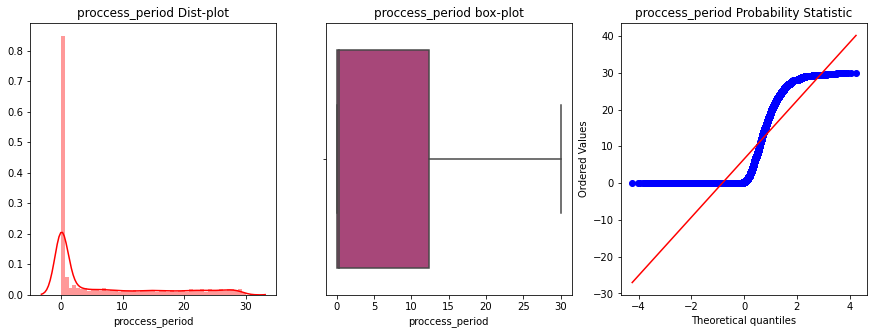

In [73]:
# Graphical representation of the column "proccess_period"
dist_box_stats_plots('proccess_period')

In [72]:
# Columns Statistical Details
column_stats('proccess_period', 630)

99% value 		:  29.022731481481486
max value 		:  29.98701388888889
Number of Ouliers 	:  0
Replace value 		:  630


In [ ]:
# In this case, we are not going to replace any values
# df3.loc[df3['proccess_period']>630, 'proccess_period'] = 630

##### 2.4.3.10) "present_days" column

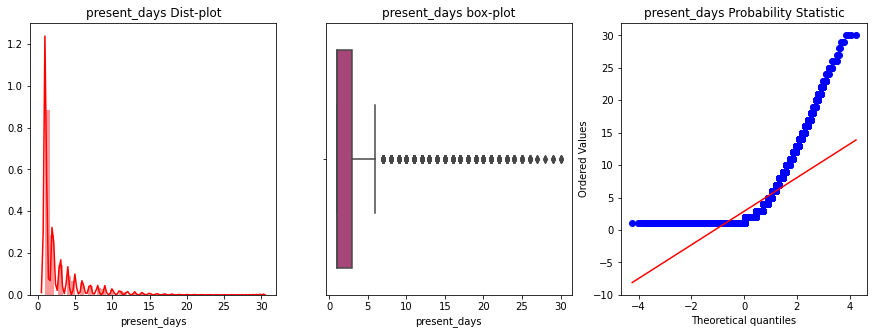

In [74]:
# Graphical representation of the column "present_days"
dist_box_stats_plots('present_days')

In [75]:
# Columns Statistical Details
column_stats('present_days', 600)

99% value 		:  16.0
max value 		:  30
Number of Ouliers 	:  0
Replace value 		:  600


In [ ]:
# In this case, we are not going to replace any values
# df3.loc[df3['present_days']>630, 'present_days']

##### 2.4.3.11) "effective_time" column

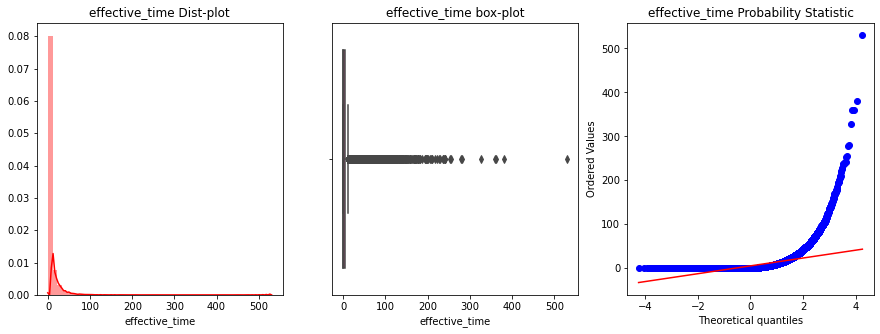

In [76]:
# Graphical representation of the column "effective_time"
dist_box_stats_plots('effective_time')

In [77]:
# Columns Statistical Details
column_stats('effective_time', 255)

99% value 		:  62.131977777777934
max value 		:  529.6336111111111
Number of Ouliers 	:  7
Replace value 		:  255


In [78]:
# Assinging 255 value to all the values greater than 255.
df3.loc[df3['effective_time']>255, 'effective_time'] = 255

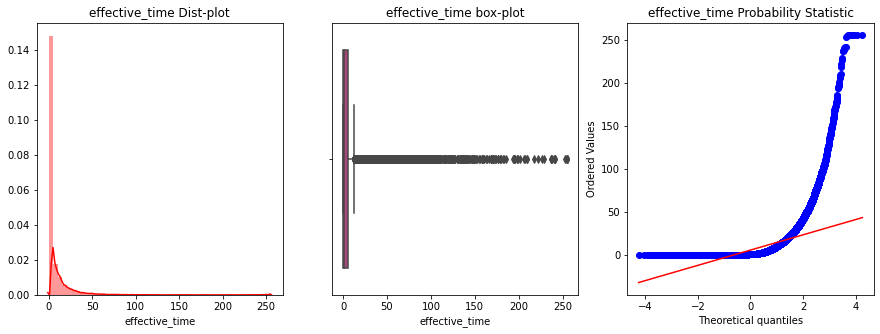

In [79]:
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots('effective_time')

99% value 		:  62.131977777777934
max value 		:  255.0
Number of Ouliers 	:  0
Replace value 		:  255


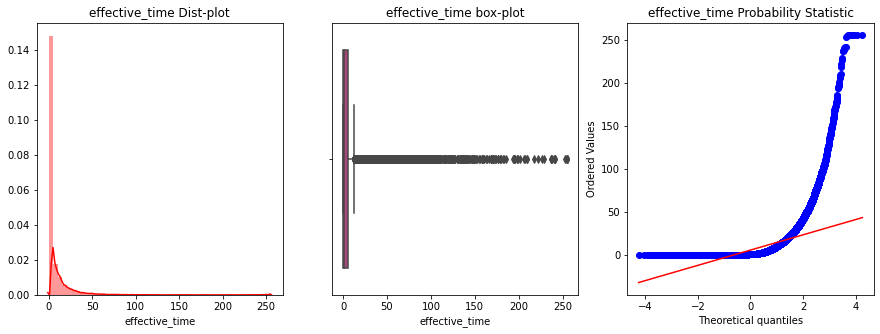

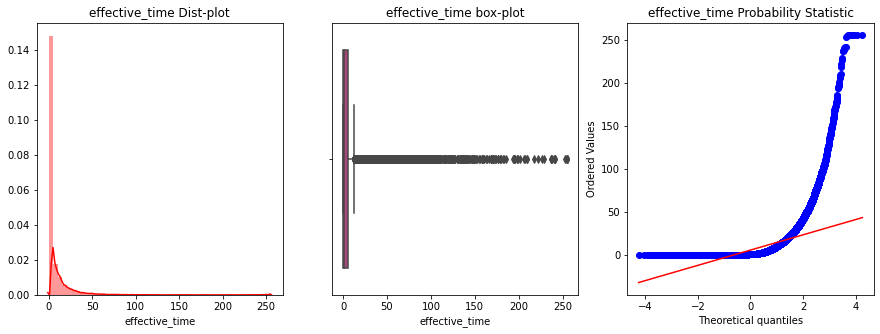

In [80]:
# Graphical representation of the column "effective_time"
dist_box_stats_plots('effective_time')
# Columns Statistical Details
column_stats('effective_time', 255)
# Assinging 255 value to all the values greater than 255.
df3.loc[df3['effective_time']>255, 'effective_time'] = 255
# Graphical representation of the column "navigate" after replacing values
dist_box_stats_plots('effective_time')

### 2.5) ================================= Analysing columns =================================

##### 2.5.1) Distribution of Course Drop Rate

In [81]:
df3['course_drop_rate'].unique()

array([0.82653423, 0.83691448, 0.86848073, 0.79967069, 0.69592527,
       0.82399103, 0.82017201, 0.76874473, 0.81408451, 0.82965728,
       0.86551155, 0.76775901, 0.76352396, 0.87409471, 0.93835616,
       0.69229397, 0.78259202, 0.77988748, 0.72860774, 0.87554585,
       0.81349206, 0.83512397, 0.66686567, 0.86660929, 0.88342697,
       0.8274832 , 0.84342561, 0.79774011, 0.89541716, 0.88376384,
       0.79705401, 0.81158238, 0.89340102, 0.88418079, 0.8434466 ,
       0.81424581, 0.91295117, 0.91935484, 0.91519435])

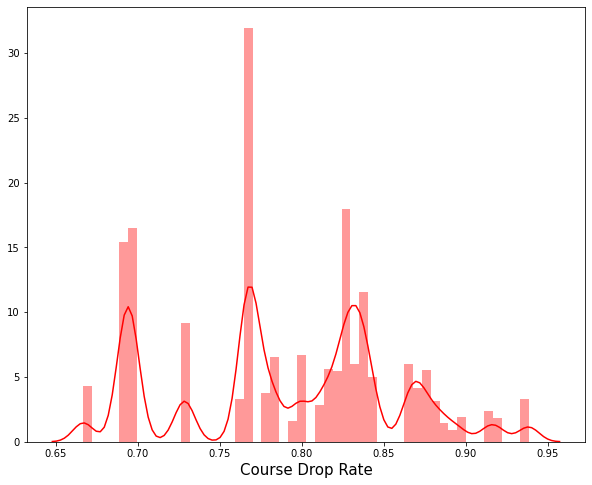

In [82]:
plt.figure(figsize=(10,8))
sns.distplot(a=df3['course_drop_rate'], hist=True, color='red')
plt.xlabel('Course Drop Rate', fontsize=15)
plt.show()

##### 2.5.2) Students presenting in days

In [83]:
# Total number of students were present during all the Mini Course provided by Institute
df3['present_days'].sum()

183952

In [84]:
df3['present_days'].unique()

array([ 2,  1,  5,  9,  4,  3,  6,  7, 15, 20,  8, 13, 10, 11, 12, 14, 22,
       21, 17, 19, 16, 23, 29, 24, 18, 25, 26, 30, 27, 28], dtype=int64)

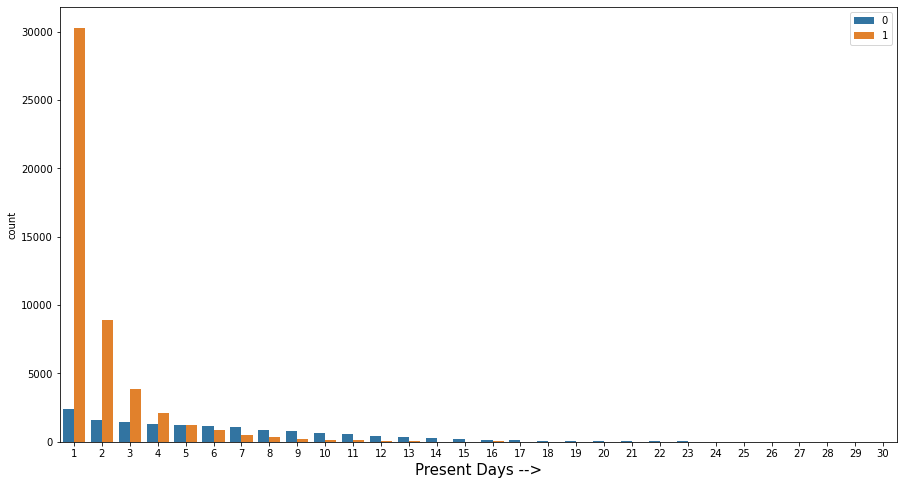

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(x='present_days', data=df3, hue='dropout_prob')
plt.xlabel('Present Days -->', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Observation**: As the number of present days increases, Number of students droping from course decreases.

**Note:** Extract values of course duration from `startdate` and `enddate`.
As Course duration is increasing, the number of students droping rate is decreases.

##### 2.5.3) Students drop or non-drop  during a week

In [86]:
# Sum of Count of Drop or Non-Drop out students during a week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',  'Saturday', 'Sunday', 'holidays']
df3.groupby(['dropout_prob'])[days].sum()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holidays
dropout_prob,,,,,,,,
0,14479,14071,13261,13395,12320,11115,11972,2860
1,14864,14051,14209,13827,13001,11647,11740,3713


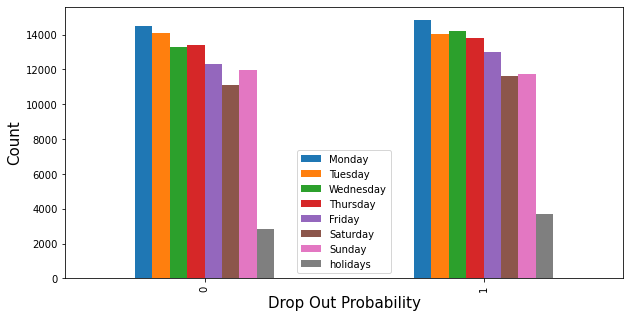

In [89]:
df3.groupby(['dropout_prob'])[days].sum().plot.bar(figsize=(10,5))
plt.xlabel('Drop Out Probability', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

##### 2.5.4) Number of times the courses opted

In [90]:
# Top 5 Courses enrolled by candidates and its count
df3['course_enroll'].value_counts()[:5]

12004    6586
10322    5716
9382     5323
8223     4471
7775     3990
Name: course_enroll, dtype: int64

In [91]:
course_enroll_num = pd.DataFrame(df3['course_enroll'].value_counts()).reset_index()
course_enroll_num.columns=['course_enroll', 'course_enroll_num1']
df3 = df3.merge(course_enroll_num, how='left', on='course_enroll')
df3.insert(23,'course_enroll_num', df3['course_enroll_num1'])
df3.drop('course_enroll_num1', axis=1, inplace=True)

##### Exporting "df3" into Excel

In [98]:
df3.to_csv('df3.csv', index=False)

# 3) ==================== Feature Selections ====================

In [99]:
df4 = pd.read_csv('df3.csv', parse_dates=['startdate','enddate'])

### 3.1) =============================== Corrrelations ===============================

#### 3.1.1) Identifying Correlations among features
Identifying highly correlated columns with the target column.

In [100]:
df4.corr()

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,present_days,effective_time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
enrollment_id,1.000000,0.018320,0.008647,0.021492,0.015143,0.009161,0.016196,0.014665,0.020604,0.016483,0.014261,0.018168,0.013129,0.008103,0.011591,0.011470,0.006983,0.005659,0.007789,0.017012,-0.002246,-0.016821,-0.013076
access,0.018320,1.000000,0.522572,0.768016,0.822830,0.716449,0.833105,0.269688,0.623957,0.792416,0.741380,0.506301,0.539873,0.487502,0.501036,0.517621,0.540422,0.512952,0.245606,0.003334,0.076622,-0.098982,-0.478099
discussion,0.008647,0.522572,1.000000,0.576565,0.453180,0.389782,0.415602,0.360130,0.330410,0.490038,0.550044,0.304362,0.340513,0.306498,0.301198,0.324302,0.329203,0.323137,0.157613,-0.000777,0.063843,-0.004277,-0.249091
navigate,0.021492,0.768016,0.576565,1.000000,0.715212,0.509019,0.616294,0.424573,0.617783,0.789093,0.702147,0.509555,0.537183,0.484250,0.486734,0.527176,0.528888,0.516440,0.250710,0.108510,0.059568,-0.142163,-0.453025
page_close,0.015143,0.822830,0.453180,0.715212,1.000000,0.521538,0.817685,0.266261,0.609931,0.751257,0.674266,0.475738,0.524448,0.453079,0.472361,0.484961,0.516347,0.489478,0.228392,0.071373,0.061793,-0.169966,-0.475796
problem,0.009161,0.716449,0.389782,0.509019,0.521538,1.000000,0.620434,0.171114,0.423603,0.527836,0.496285,0.325355,0.363782,0.329935,0.345618,0.341998,0.360213,0.335393,0.157265,-0.090318,0.067695,0.002847,-0.322934
video,0.016196,0.833105,0.415602,0.616294,0.817685,0.620434,1.000000,0.215660,0.529405,0.662155,0.627282,0.416271,0.443681,0.410595,0.418764,0.429402,0.458216,0.436469,0.196994,-0.035864,0.058514,-0.046721,-0.405771
wiki,0.014665,0.269688,0.360130,0.424573,0.266261,0.171114,0.215660,1.000000,0.223332,0.291636,0.272703,0.187985,0.187009,0.184840,0.171323,0.221213,0.171975,0.203988,0.074558,0.109650,-0.008311,-0.044469,-0.167603
proccess_period,0.020604,0.623957,0.330410,0.617783,0.609931,0.423603,0.529405,0.223332,1.000000,0.800181,0.523032,0.506357,0.556196,0.478433,0.498596,0.532960,0.540480,0.525632,0.265201,0.078477,0.157741,-0.152308,-0.526236
present_days,0.016483,0.792416,0.490038,0.789093,0.751257,0.527836,0.662155,0.291636,0.800181,1.000000,0.775613,0.639552,0.679858,0.611651,0.624773,0.666221,0.673557,0.654256,0.319168,0.076571,0.146334,-0.138672,-0.547504


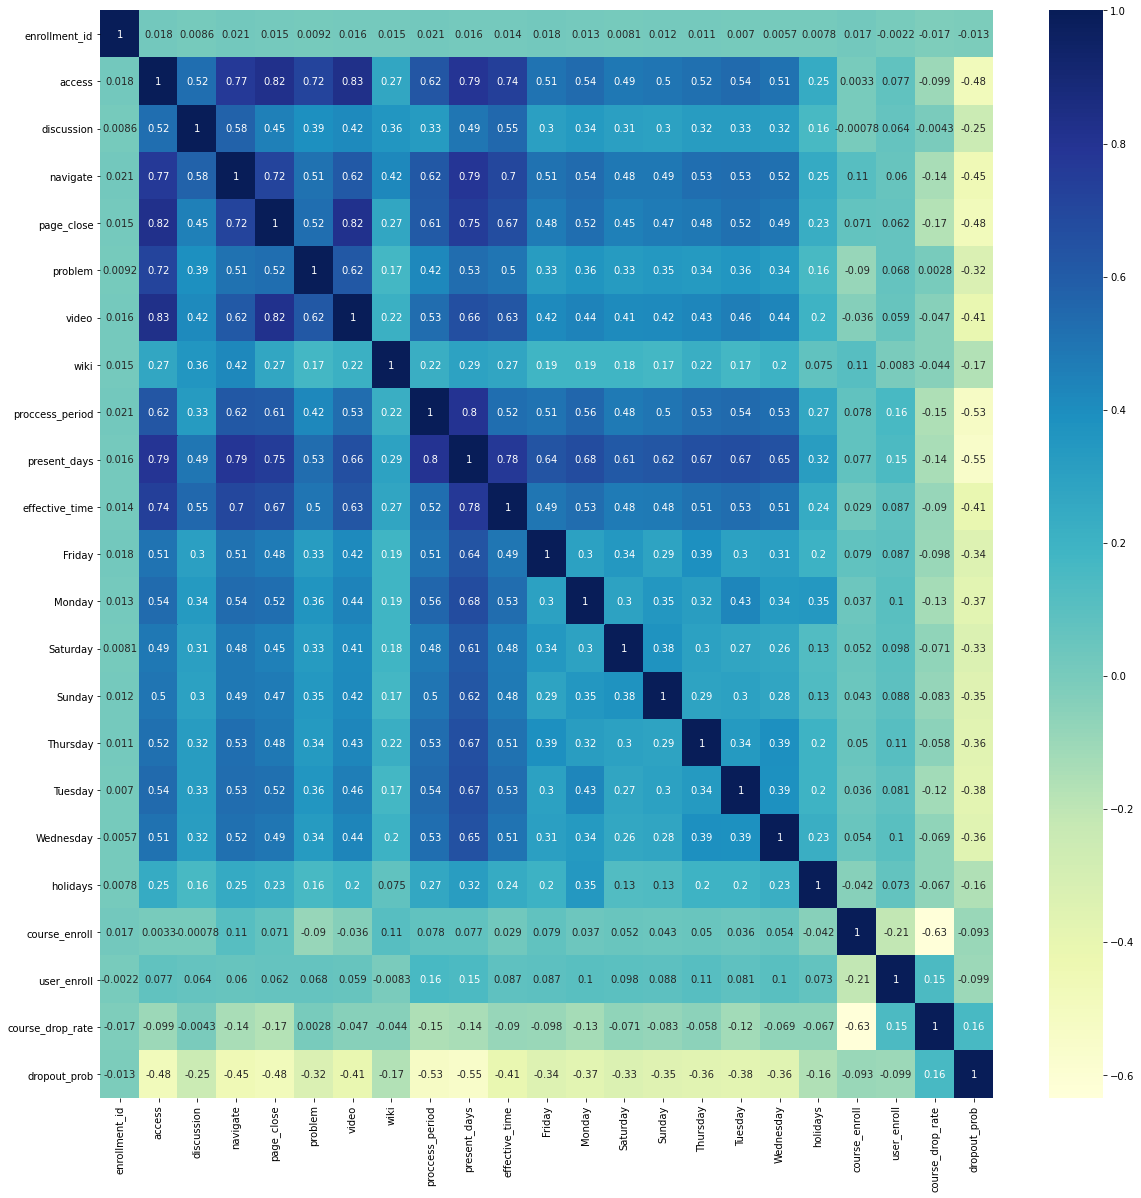

In [101]:
# Observing correlation visually using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [102]:
np.where(df4.corr()>0.8)

(array([ 0,  1,  1,  1,  2,  3,  4,  4,  4,  5,  6,  6,  6,  7,  8,  8,  9,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       dtype=int64),
 array([ 0,  1,  4,  6,  2,  3,  1,  4,  6,  5,  1,  4,  6,  7,  8,  9,  8,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       dtype=int64))

In [103]:
# Highly corelated values among all feautures to be removed from data frame
Df4_Corr = df4.corr()
Df4_Corr_features = np.where(Df4_Corr>0.8)
[(Df4_Corr.columns[x], Df4_Corr.columns[y]) for x,y in zip(*Df4_Corr_features) if x!=y and x<y]

[('access', 'page_close'),
 ('access', 'video'),
 ('page_close', 'video'),
 ('proccess_period', 'present_days')]

In [105]:
# Cross checking the how the above resulted columns are correlated with the target column
df4[['access', 'page_close', 'video', 'proccess_period', 'present_days','course_enroll', 'course_drop_rate', 'dropout_prob']].corr().abs()

,access,page_close,video,proccess_period,present_days,course_enroll,course_drop_rate,dropout_prob
access,1.000000,0.822830,0.833105,0.623957,0.792416,0.003334,0.098982,0.478099
page_close,0.822830,1.000000,0.817685,0.609931,0.751257,0.071373,0.169966,0.475796
video,0.833105,0.817685,1.000000,0.529405,0.662155,0.035864,0.046721,0.405771
proccess_period,0.623957,0.609931,0.529405,1.000000,0.800181,0.078477,0.152308,0.526236
present_days,0.792416,0.751257,0.662155,0.800181,1.000000,0.076571,0.138672,0.547504
course_enroll,0.003334,0.071373,0.035864,0.078477,0.076571,1.000000,0.634425,0.093038
course_drop_rate,0.098982,0.169966,0.046721,0.152308,0.138672,0.634425,1.000000,0.157459
dropout_prob,0.478099,0.475796,0.405771,0.526236,0.547504,0.093038,0.157459,1.000000


**Decisions taken**  
Keeping column "`access`" since it is more correlated with target column '`dropout_prob`' than the columns '`page_close`' and '`video`'.

Keeping column "`present_days`" since it is more correlated with target column '`dropout_prob`' than the column '`process_period`'.

So, the removing columns are '`page_close`', '`video`', '`proccess_period`'.

##### 3.1.2) Removing low correlated columns

In [106]:
df4.drop(['page_close', 'video', 'proccess_period'], axis=1, inplace=True)

In [107]:
df4.columns

Index(['enrollment_id', 'startdate', 'enddate', 'access', 'discussion',
       'navigate', 'problem', 'wiki', 'present_days', 'effective_time',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'holidays', 'course_enroll', 'user_enroll',
       'course_drop_rate', 'dropout_prob'],
      dtype='object')

In [108]:
df4.to_csv("df4.csv", index=False)

# 4) ==================== Features Scaling ====================

In [109]:
df5 = pd.read_csv('df4.csv', parse_dates=['startdate', 'enddate'])

### 4.1) ======================== Creating input (X) and output (y) ========================

In [111]:
X = df5.iloc[:, 3:-1]
y = df5['dropout_prob']

### 4.2) =============================== Log Transformation ===============================

In [112]:
# Log Transformation
X_log = np.log(X+1)
X_log.head()

,access,discussion,navigate,problem,wiki,present_days,effective_time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate
0,3.332205,0.000000,2.197225,4.382027,0.000000,1.098612,1.845651,0.000000,0.0,0.693147,0.693147,0.000000,0.000000,0.000000,0.0,8.452121,0.693147,0.602420
1,2.079442,1.609438,1.386294,0.000000,0.693147,0.693147,0.338454,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,8.958797,0.693147,0.608087
2,3.555348,0.693147,1.945910,0.000000,0.000000,1.791759,3.380636,0.693147,0.0,0.693147,0.693147,0.693147,0.000000,0.693147,0.0,8.008366,1.098612,0.625126
3,4.007333,1.609438,1.945910,3.091042,0.693147,1.098612,1.083311,0.693147,0.0,0.000000,0.000000,0.693147,0.000000,0.000000,0.0,8.000349,1.098612,0.587604
4,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.003605,0.000000,0.0,0.000000,0.000000,0.000000,0.693147,0.000000,0.0,9.242130,0.693147,0.528228


### 4.3) =============================== Standard Scaling ===============================

In [113]:
from sklearn.preprocessing import StandardScaler

StdScale = StandardScaler()
X_scale = StdScale.fit_transform(X_log)
X_scale = pd.DataFrame(X_scale, columns=X_log.columns)
X_scale.head()

,access,discussion,navigate,problem,wiki,present_days,effective_time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate
0,0.657062,-0.629702,0.351857,2.188777,-0.543439,-0.078294,0.722541,-0.629875,-0.674193,1.254392,1.208317,-0.656827,-0.663621,-0.664760,-0.338614,0.079626,-0.821020,0.546839
1,-0.181039,0.736684,-0.576588,-0.704110,0.650330,-0.768220,-0.591977,-0.629875,-0.674193,-0.594885,-0.600284,-0.656827,-0.663621,1.065755,-0.338614,0.720553,-0.821020,0.699475
2,0.806345,-0.041232,0.064124,-0.704110,-0.543439,1.101143,2.061293,1.146214,-0.674193,1.254392,1.208317,1.074124,-0.663621,1.065755,-0.338614,-0.481708,-0.008164,1.158395
3,1.108724,0.736684,0.064124,1.336506,0.650330,-0.078294,0.057657,1.146214,-0.674193,-0.594885,-0.600284,1.074124,-0.663621,-0.664760,-0.338614,-0.491848,-0.008164,0.147761
4,-1.572189,-0.629702,-0.905959,-0.704110,-0.543439,-0.768220,-0.884019,-0.629875,-0.674193,-0.594885,-0.600284,-0.656827,1.040586,-0.664760,-0.338614,1.078958,-0.821020,-1.451479


# 5) ================== Feature Engineering ==================

##### 5.1) Verifying that the data is Balanced/Unbalanaced

**Unbalnaced data** : Unbalanced data refers to classification problems where we have unequal instances for different classes.

Not Dropped : 14874
Dropped     : 48869
Ratio       : 0.30436473019705745


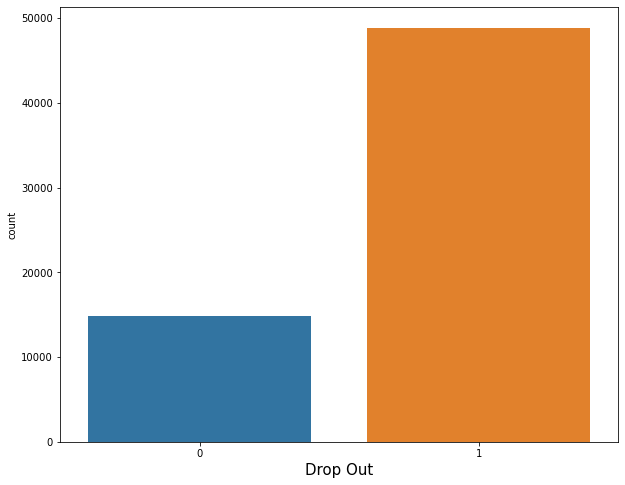

In [114]:
plt.figure(figsize=(10,8))
sns.countplot(x=y)
plt.xlabel('Drop Out', fontsize=15)
print('Not Dropped :', (y==0).sum())
print('Dropped     :', (y==1).sum())
print('Ratio       :', ((y==0).sum())/((y==1).sum()))
plt.show()

**Observation**: Here clearly shown that the data is **Unbalanced**.  
**To Fix this**: Fixing unbalanced data can be done by UPSAMPLING or DOWNSAMPLING.

##### 5.2) Spliting training and testing data before UpSampling

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

##### 5.3) Balancing the training data by UpSampling

In [116]:
from sklearn.utils import resample

# concatenate our training data back together
X1 = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
dropout_minor = X1[X1.dropout_prob==0]
dropout_major = X1[X1.dropout_prob==1]

# Upsample minority
dropout_upsampled = resample(dropout_minor,
                          replace=True, # sample with replacement
                          n_samples=len(dropout_major), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([dropout_major, dropout_upsampled])

# check new class counts
upsampled.dropout_prob.value_counts()

1    34117
0    34117
Name: dropout_prob, dtype: int64

In [117]:
# Again spilting in order to get dependent and independent variable
y_train = upsampled.dropout_prob
X_train = upsampled.drop('dropout_prob', axis=1)

##### Exporting data into excel files

In [118]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# 6) ===================== Model Selection =====================

In [119]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [181]:
y_test=y_test['dropout_prob']

##### 6.1) Importing Required Libraries

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

##### 6.2) Creating a function which finds accuracy of train and test data

In [154]:
def model_selection(data, models):
    X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]
    
    # Storing all model's scorings,  confusion_matrix values into a dataframe
    cols = ['train_score', 'test_score', 'confusion_matrix']
    models_scores = pd.DataFrame(index=models, columns=cols)
    
    count=0
    for model in models:
        if model == "RandomForestClassifier":
            classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0)
            count+=1
        elif model == "KNeighborsClassifier":
            classifier = KNeighborsClassifier(metric = 'minkowski', p = 2)
            count+=1
        elif model == "GaussianNB":
            classifier = GaussianNB()
            count+=1
        elif model =="DecisionTreeClassifier":
            classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
            count+=1
        elif model == "XGBClassifier":
            classifier = XGBClassifier()
            count+=1
        elif model == "SVC":
            classifier = SVC(kernel = 'rbf', random_state = 0)
            count+=1
        elif model = 'LogisticRegression'
            classifier = LogisticRegression()
            count+=1
        elif count==0:
            print("Please enter one of following model names:\n ")
            models_list = ['RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'XGBClassifier', 'SVC', 'LogisticRegression']
            return models_list

        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
               
        # Storing score values into "models_scores" dataframe
        models_scores['train_score'][model]=classifier.score(X_train, y_train)
        models_scores['test_score'][model]=classifier.score(X_test, y_test)
        models_scores['confusion_matrix'][model] = confusion_matrix(y_test, y_test_pred)
        
    return models_scores

##### 6.3) Run the Function

In [246]:
data = [X_train, X_test, y_train, y_test]
models = ['RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'LogisticRegression']
models_scores = model_selection(data, models)

In [247]:
models_scores

,train_score,test_score,confusion_matrix
RandomForestClassifier,0.998197,0.840349,"[[2566, 1805], [1248, 13504]]"
KNeighborsClassifier,0.886435,0.736443,"[[2943, 1428], [3612, 11140]]"
GaussianNB,0.768503,0.814203,"[[3026, 1345], [2208, 12544]]"
DecisionTreeClassifier,0.998197,0.773048,"[[2287, 2084], [2256, 12496]]"
LogisticRegression,0.998197,0.773048,"[[2287, 2084], [2256, 12496]]"


# 7) ================= Hyperparameter Tuning =================

##### 7.1) Importing Required Libraries

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV        # using for "LogisticRegression"
from sklearn.model_selection import RandomizedSearchCV  # using for "DecisionTreeClassifier" and "RandomForestClassifier"
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

##### 7.2) Create a function for tuning parameters

In [251]:
def hyper_para_tuning(data, models):
    
    X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]
    
    # Storing all model's scorings,  confusion_matrix, classification_report values into a dataframe
    cols = ["model_score", "best_score", "best_params", "n_mislabled", "roc_auc_score", "confusion_matrix", "classification_report", "fpr", "tpr", "thresholds", "roc_auc", 'cross_val_score']
    models_scores_hyp = pd.DataFrame(index=models, columns=cols)
    
    for mod in models:
        if mod == 'LogisticRegression':
            tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] , 
                                'penalty':['l1','l2']
                               }
            LR = LogisticRegression()
            model = GridSearchCV(LR, tuned_parameters, cv=10)
        elif mod == 'DecisionTreeClassifier':
            tuned_parameters= {'criterion': ['gini','entropy'], 
                               'max_features': ["auto","sqrt","log2"],
                               'min_samples_leaf': range(1,100,1) , 
                               'max_depth': range(1,50,1)
                               }
            DTC = DecisionTreeClassifier()
            model = RandomizedSearchCV(DTC, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)
        elif mod == 'RandomForestClassifier':
            tuned_parameters = {'min_samples_leaf': range(10,100,5), 
                                'n_estimators' : range(1,50,10),
                                'max_features':['auto','sqrt','log2']
                               }
            RFC = RandomForestClassifier(class_weight= {0: 1, 1: 1})
            model = RandomizedSearchCV(RFC, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)
    

        model.fit(X_train, y_train)
        y_test_prob = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
        y_test_pred = np.where(y_test_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
        fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
        roc_auc = auc(fpr, tpr)
                
        models_scores_hyp["model_score"][mod] = model.score(X_test, y_test_pred)
        models_scores_hyp["best_score"][mod] = model.best_score_
        models_scores_hyp["best_params"][mod] = model.best_params_
        models_scores_hyp["n_mislabled"][mod] = (y_test!= y_test_pred).sum()
        models_scores_hyp["fpr"][mod] = fpr
        models_scores_hyp["tpr"][mod] = tpr
        models_scores_hyp["thresholds"][mod] = thresholds
        models_scores_hyp["roc_auc"][mod] = roc_auc
        models_scores_hyp["confusion_matrix"][mod] = confusion_matrix(y_test, y_test_pred)
        models_scores_hyp["roc_auc_score"][mod] = roc_auc_score(y_test, y_test_pred)
        models_scores_hyp["classification_report"][mod] = classification_report(y_test, y_test_pred)
        models_scores_hyp["cross_val_score"][mod] = cross_val_score(model, X_test, y_test, cv=10, scoring='accuracy')
        
        plt.figure(figsize=(5,5))
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
    
    return models_scores_hyp

##### 7.3) Running the function

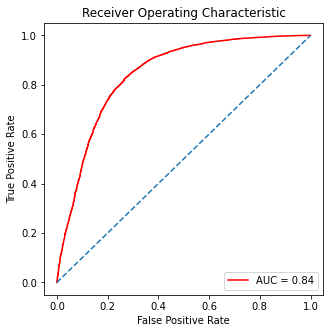

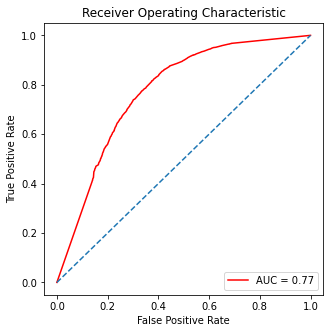

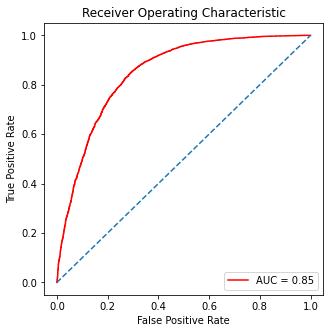

In [252]:
data = [X_train, X_test, y_train, y_test]
models = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
models_scores_hyp = hyper_para_tuning(data, models)

In [253]:
models_scores_hyp

,model_score,best_score,best_params,n_mislabled,roc_auc_score,confusion_matrix,classification_report,fpr,tpr,thresholds,roc_auc,cross_val_score
LogisticRegression,1,0.776021,"{'C': 0.01, 'penalty': 'l2'}",3757,0.7784,"[[3200, 1171], [2586, 12166]]",precision recall f1-score ...,"[0.0, 0.0, 0.0, 0.00022878059940517045, 0.0002...","[0.0, 6.778741865509762e-05, 0.002372559652928...","[1.9206559818256501, 0.9206559818256501, 0.906...",0.842954,"[0.8374281233664401, 0.8342916884474647, 0.856..."
DecisionTreeClassifier,1,0.802401,"{'min_samples_leaf': 10, 'max_features': 'log2...",4624,0.71915,"[[2829, 1542], [3082, 11670]]",precision recall f1-score ...,"[0.0, 0.13818348204072295, 0.13818348204072295...","[0.0, 0.40523318872017355, 0.4065889370932755,...","[2.0, 1.0, 0.984375, 0.9777777777777777, 0.973...",0.77391,"[0.8337689492943021, 0.836382645060115, 0.8525..."
RandomForestClassifier,1,0.839098,"{'n_estimators': 41, 'min_samples_leaf': 10, '...",3289,0.776553,"[[2980, 1391], [1898, 12854]]",precision recall f1-score ...,"[0.0, 0.0, 0.0, 0.00022878059940517045, 0.0002...","[0.0, 6.778741865509762e-05, 0.000542299349240...","[1.9954408345585468, 0.9954408345585468, 0.992...",0.849189,"[0.840041819132253, 0.8410872974385781, 0.8646..."


In [254]:
models_scores_hyp['cross_val_score']['LogisticRegression']

array([0.83742812, 0.83429169, 0.85676947, 0.8498954 , 0.84100418,
       0.85512552, 0.86297071, 0.84100418, 0.85774059, 0.8373431 ])

In [255]:
print(models_scores_hyp['classification_report']['LogisticRegression'])

              precision    recall  f1-score   support

           0       0.55      0.73      0.63      4371
           1       0.91      0.82      0.87     14752

    accuracy                           0.80     19123
   macro avg       0.73      0.78      0.75     19123
weighted avg       0.83      0.80      0.81     19123



##### Conclusion from all the above modles

Text(0.5, 0, 'False Positive Rate')

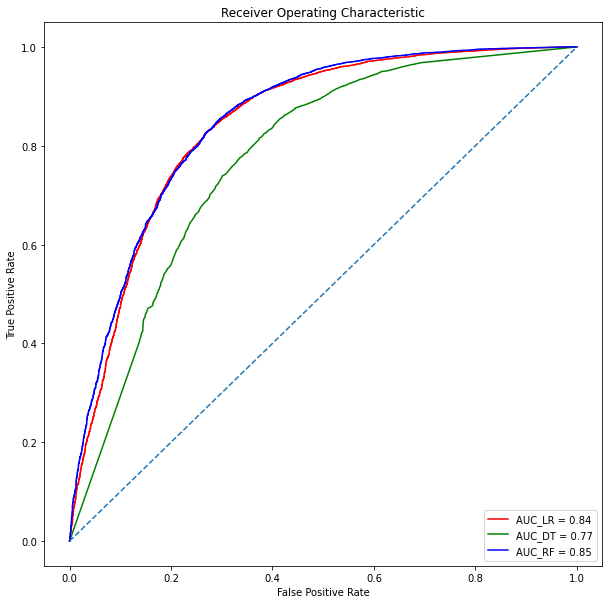

In [256]:
# Conclusion

fpr_LR = models_scores_hyp['fpr']['LogisticRegression']
tpr_LR = models_scores_hyp['tpr']['LogisticRegression']
roc_auc_LR = models_scores_hyp['roc_auc']['LogisticRegression']

fpr_DT = models_scores_hyp['fpr']['DecisionTreeClassifier']
tpr_DT = models_scores_hyp['tpr']['DecisionTreeClassifier']
roc_auc_DT = models_scores_hyp['roc_auc']['DecisionTreeClassifier']

fpr_RF = models_scores_hyp['fpr']['RandomForestClassifier']
tpr_RF = models_scores_hyp['tpr']['RandomForestClassifier']
roc_auc_RF = models_scores_hyp['roc_auc']['RandomForestClassifier']


plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_LR, tpr_LR, color='red',label = 'AUC_LR = %0.2f' % roc_auc_LR)
plt.plot(fpr_DT, tpr_DT, color='green',label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, color='blue',label = 'AUC_RF = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# %%%%%%%%%%%=== Rough Work ===%%%%%%%%%%%

### SelectKBest

In [ ]:
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2, label=r'Univariate score ($-Log(p_{value})$)')

### PCA

In [ ]:
### PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X_scale)
# Covariance
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
print(explained_variance.shape)

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 8))
    
    plt.bar(range(21), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
plt.scatter(x_scale[:,0],x[:,1])

### KMeans cluster

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (10,10))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model= LogisticRegression()
model.fit(X_train,y_train)
y_test_prob = model.predict_proba(X_test)[:,1]# This will give you positive class prediction probabilities  
y_test_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print(model.score(X_test, y_test_pred))
cm = confusion_matrix(y_test,y_test_pred)
cm

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
auc_roc = roc_auc_score(y_test,y_test_pred)
print(auc_roc)
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_test_prob)
roc_auc_LR = auc(fpr_LR, tpr_LR)
print(roc_auc_LR)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_LR, tpr_LR, color='red',label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

##### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
y_pred = ada_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Usefull concepts - study later

In [ ]:
cars.carbody.value_counts().plot(kind='bar')
sns.countplot(cars.symboling, palette=("cubehelix"))
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))
df.plot.bar(figsize=(8,6))
sns.scatterplot(x=cars['fueleconomy'],y=cars['price_x'],hue=cars['drivewheel'])
df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price_x'].mean().unstack(fill_value=0))


In [ ]:
def count_box_plot(graph_columns):
    rows = len(graph_columns)
    cols = 2
    plt.figure(figsize=(cols*7.5, rows*5))
    for i in range(len(graph_columns)):
        pos = 2*i+1
        col_name = graph_columns[i]
        plt.subplot(rows,cols,pos)
        plt.title(col_name +' Histogram')
        sns.countplot(cars[col_name],palette=("magma"))

        plt.subplot(rows,cols,pos+1)
        plt.title(col_name +' vs Price')
        sns.boxplot(x=cars[col_name], y=cars.price, palette=("magma"))
    plt.tight_layout()

# List of categorical column names 
categorical_columns = ['enginelocation', 'cylindernumber', 'fuelsystem', 'drivewheel']

# Calling function
count_box_plot(categorical_columns)

In [ ]:
def scatter_plot(numerical_columns):
    cols = 2
    rows = math.ceil(len(numerical_columns)/cols)
    plt.figure(figsize=(cols*5, rows*5))
    
    for i in range(len(numerical_columns)):
        plt.subplot(rows,cols,i+1)
        plt.scatter(cars[numerical_columns[i]], cars['price'])
        plt.title(numerical_columns[i] +' vs Price')
        plt.ylabel('Price')
        plt.xlabel(numerical_columns[i])
    plt.tight_layout()

# List of Numerical column names
numerical_columns = ['carlength', 'carwidth', 'carheight', 'curbweight']

# Calling function
scatter_plot(numerical_columns)

In [ ]:
def pair_plot(col_list):
    sns.pairplot(cars, x_vars=col_list, y_vars='price',size=2, aspect=1, kind='reg')
    plt.show()

In [ ]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

In [ ]:
# Features scalling
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
num_vars = list(cars_lr.select_dtypes(exclude=['object','category']).columns)
cars_numerical[num_vars] = MMS.fit_transform(cars_numerical[num_vars])

In [ ]:
# Features selections
LR = LinearRegression()
rfe = RFE(LR, 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

cars_feature_selections = pd.DataFrame([X_train.columns, rfe.support_, rfe.ranking_]).T
cars_feature_selections.columns = ['Columns', 'Support', 'Ranking']
cars_feature_selections

X_train.columns[rfe.support_]

# Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()



In [ ]:
def build_model(X, y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y, X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

X_train_new = build_model(X_train_rfe, y_train)
checkVIF(X_train_new)

In [ ]:
from sklearn.datasets import make_friedman1
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

In [ ]:
# Feature selections for classification model
from sklearn.feature_selection import f_classif
f_val, p_val = f_classif(X, y)


##### Feature selections
https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

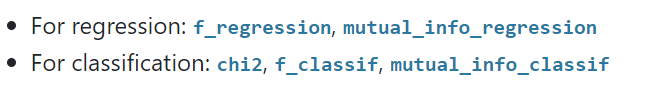

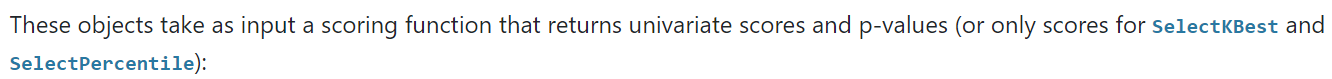